<a href="https://colab.research.google.com/github/PingPingE/Learn_ML_DL/blob/main/Practice/Hands_On_ML/ch14-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 컴퓨터 비전


## 텐서플로 구현
- 텐서플로에서 각 입력 이미지는 보통 [높이, 너비, 채널] 형태의 3D 텐서로 표현된다.
- 하나의 미니배치는 [미니배치 크기, 높이, 너비, 채널] 형태의 4D 텐서로 표현된다.
- 합성곱 층의 가중치는 [f_h, f_w, f_n', f_n] 형태의 4D 텐서로 표현된다.
- 합성곱 층의 편향은 간단하게 [f_n]형태의 1D 텐서로 나타낸다.


*f_n' : 이전 층의 피처맵 수(input channel)

### 데이터 로드

In [8]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#로드 및 정규화
china= load_sample_image("china.jpg")/255
flower= load_sample_image("flower.jpg")/255


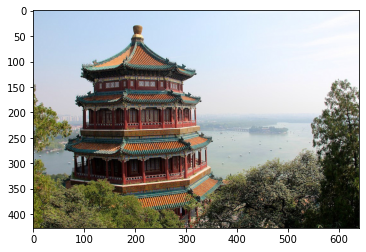

In [10]:
plt.imshow(china)

In [13]:
china.shape

(427, 640, 3)

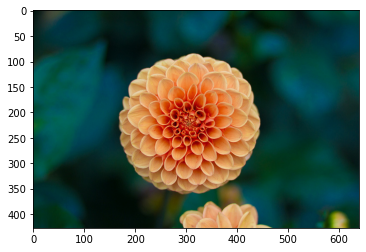

In [11]:
plt.imshow(flower)

In [14]:
flower.shape

(427, 640, 3)

In [15]:
images=np.array([china,flower]) #입력으로 넣기 위해 합쳐서 4D 텐서로 만들기
batch_size, height, weight, channels = images.shape

In [16]:
images.shape

(2, 427, 640, 3)

### 두 개의 7*7 필터 만들기

In [ ]:
#필터 2개 만들기
filters=np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:, 3, :, 0] =1 #수직선
filters[3,:,:,1]=1 #수평선

In [38]:
filters.shape

(7, 7, 3, 2)

In [6]:
outputs=tf.nn.conv2d(images, filters, strides=1, padding="SAME") #제로 패딩 사용

<function matplotlib.pyplot.show>

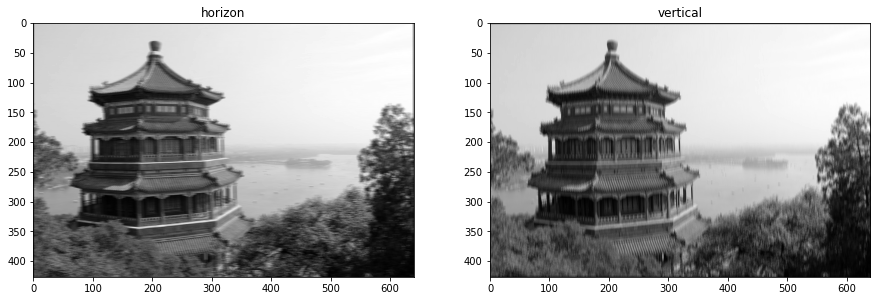

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("horizon")
plt.imshow(outputs[0,:,:,1], cmap="gray") 
plt.subplot(1,2,2)
plt.title("vertical")
plt.imshow(outputs[0,:,:,0], cmap="gray")
plt.show

------------
오른쪽 이미지를 보면, 왼쪽보다 수직선이 좀 더 강조 된 것을 알 수 있다.

<function matplotlib.pyplot.show>

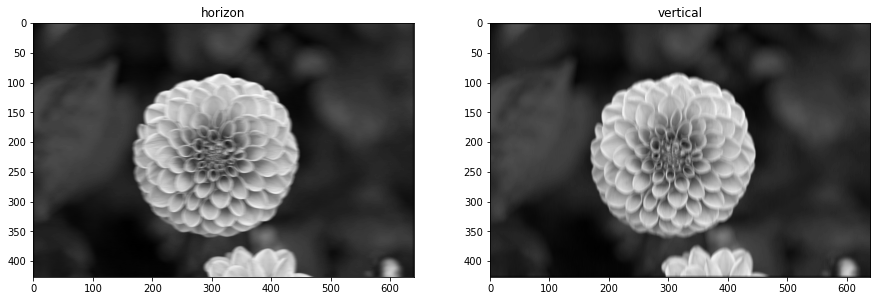

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("horizon")
plt.imshow(outputs[1,:,:,1], cmap="gray") 
plt.subplot(1,2,2)
plt.title("vertical")
plt.imshow(outputs[1,:,:,0], cmap="gray")
plt.show

### 케라스로 필터 학습
- 앞에서는 수동으로 필터를 직접 정의했지만, 실제 CNN에서는 보통 훈련 가능한 변수로 필터를 정의한다.
- 따라서 신경망이 가장 잘 맞는 필터를 찾기 위해 학습할 수 있는 것이다.

In [42]:
from tensorflow import keras
conv =keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')